In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 255
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Diseases", shuffle=True, image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 1314 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['bacterial_leaf_blight', 'brown_spot', 'rice_leaf_blast']

In [5]:
len(dataset)

42

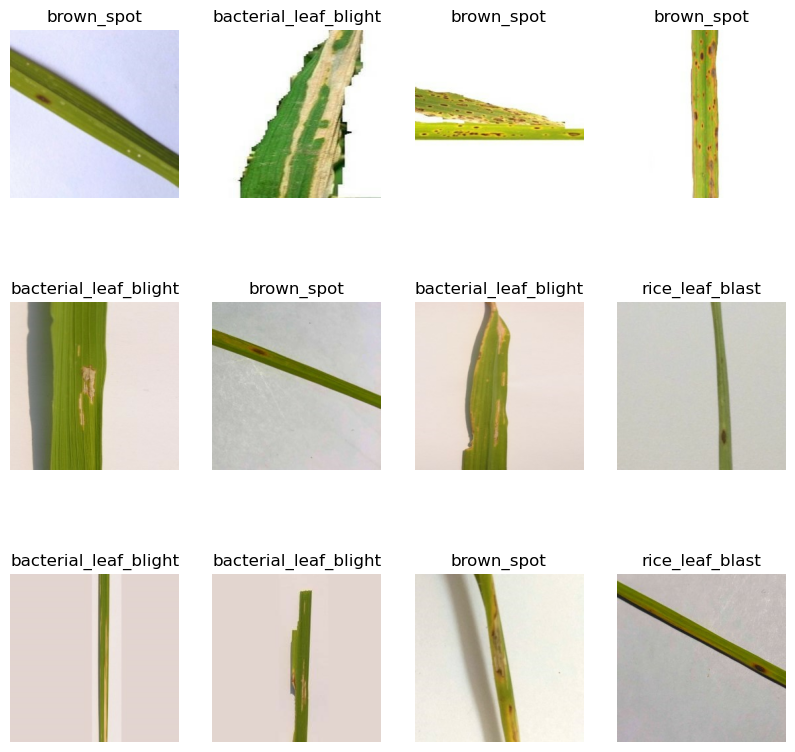

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
len(dataset) * 0.8

33.6

In [8]:
train_ds = dataset.take(33)
len(train_ds)

33

In [9]:
test_ds_and_validation_ds = dataset.skip(33)
len(test_ds_and_validation_ds)

9

In [10]:
validation_size = 0.1
len(dataset) * 0.1

4.2

In [11]:
validation_ds = test_ds_and_validation_ds.take(4)
len(validation_ds)

4

In [12]:
test_ds = test_ds_and_validation_ds.skip(4)
len(test_ds)

5

In [13]:
train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 255, 255, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_data=validation_ds)

Epoch 1/50


33/33 [==============================] - 45s 1s/step - loss: 1.1016 - accuracy: 0.3125 - val_loss: 1.0972 - val_accuracy: 0.3281
Epoch 2/50
33/33 [==============================] - 40s 1s/step - loss: 1.0686 - accuracy: 0.4299 - val_loss: 1.0117 - val_accuracy: 0.5547
Epoch 3/50
33/33 [==============================] - 39s 1s/step - loss: 0.9906 - accuracy: 0.5028 - val_loss: 0.9391 - val_accuracy: 0.6250
Epoch 4/50
33/33 [==============================] - 39s 1s/step - loss: 0.9120 - accuracy: 0.5549 - val_loss: 0.8659 - val_accuracy: 0.7031
Epoch 5/50
33/33 [==============================] - 39s 1s/step - loss: 0.8869 - accuracy: 0.5511 - val_loss: 0.8290 - val_accuracy: 0.6875
Epoch 6/50
33/33 [==============================] - 44s 1s/step - loss: 0.8105 - accuracy: 0.6278 - val_loss: 0.8374 - val_accuracy: 0.7891
Epoch 7/50
33/33 [==============================] - 42s 1s/step - loss: 0.7256 - accuracy: 0.7159 - val_loss: 0.9046 - val_accuracy: 0.5625
Epoch 8/50
33/33 [

In [20]:
model_version = 1
model.save(f"../Models/{model_version}")
loaded_model = tf.keras.models.load_model(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/1\assets


INFO:tensorflow:Assets written to: ../Models/1\assets


In [21]:
scores = loaded_model.evaluate(test_ds)

5/5 [==============================] - 2s 197ms/step - loss: 0.2238 - accuracy: 0.9000


In [22]:
scores

[0.22378037869930267, 0.8999999761581421]

In [23]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 33}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

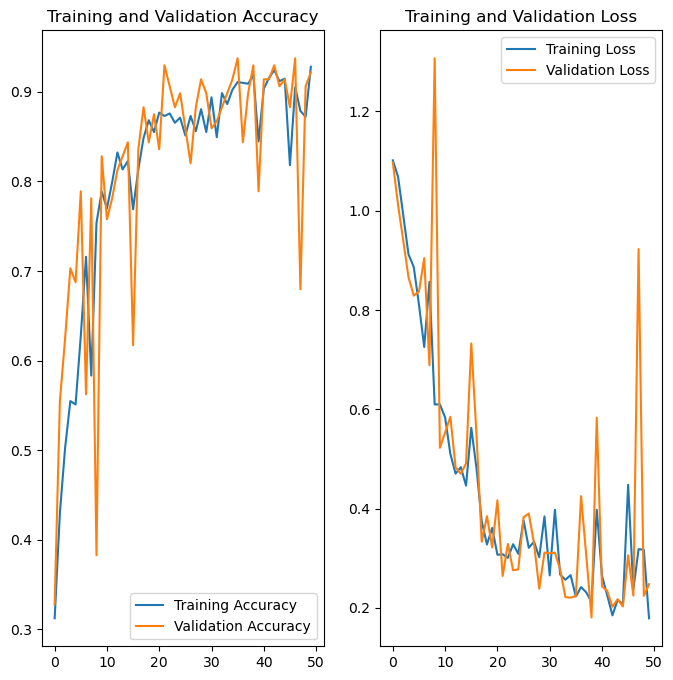

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
actual label: bacterial_leaf_blight
1/1 [==============================] - 0s 453ms/step
predicted label: bacterial_leaf_blight


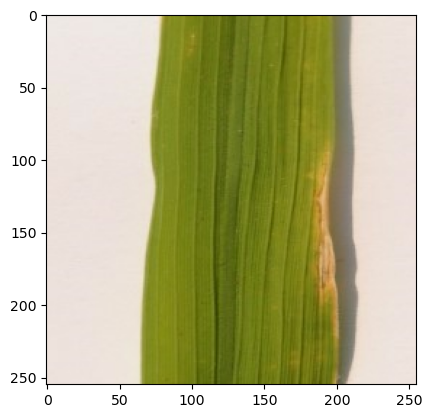

In [28]:
for images_batch, label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


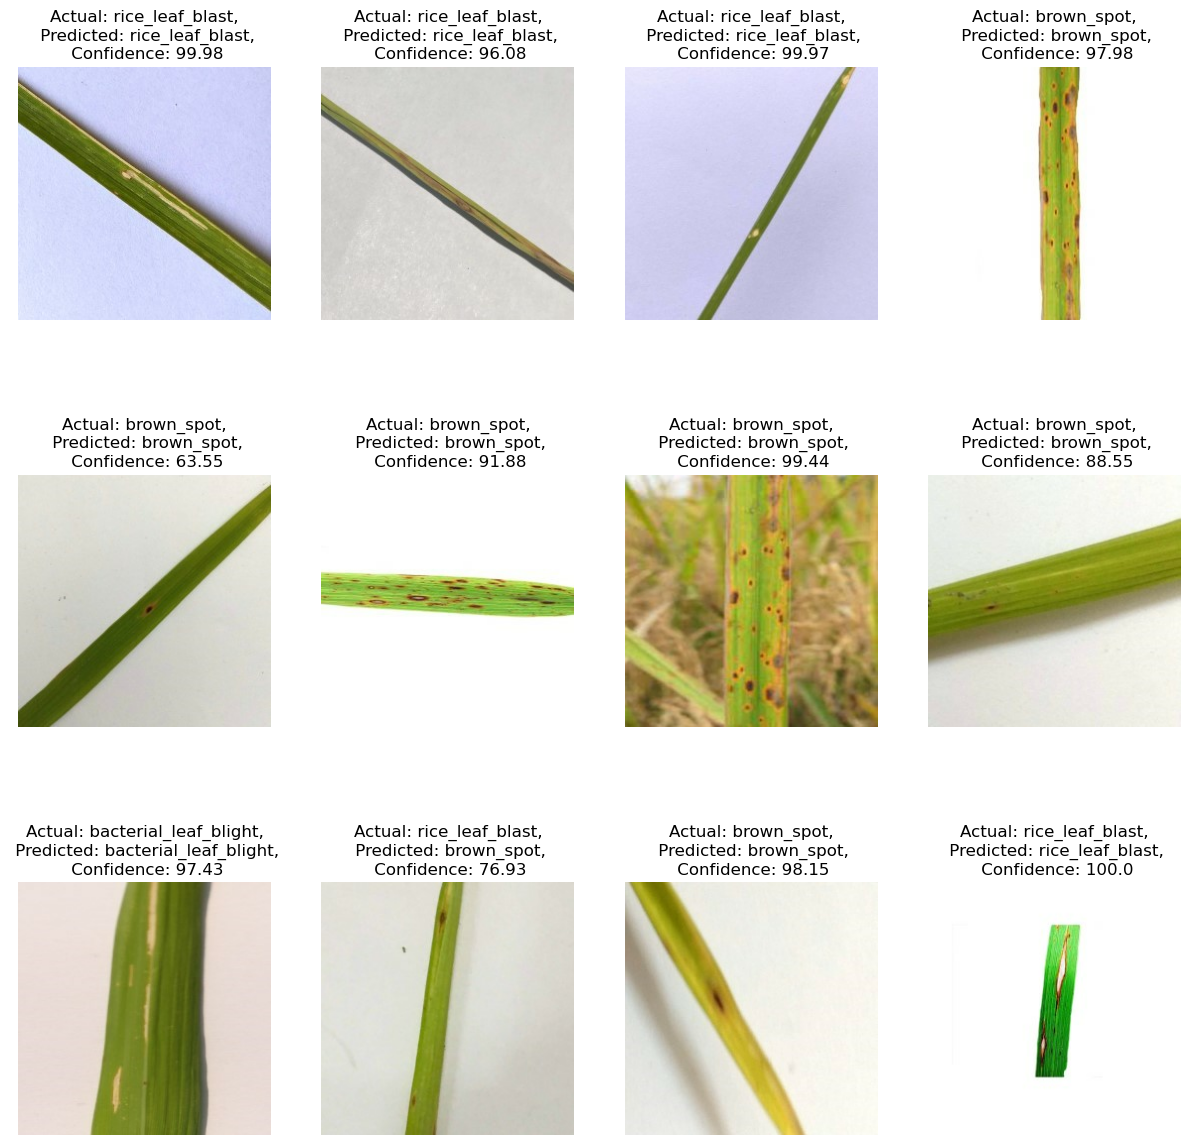

In [30]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")
        plt.savefig("predictions.jpg", format="jpg")
        plt.axis('off')
    

1/1 [==============================] - 0s 30ms/step


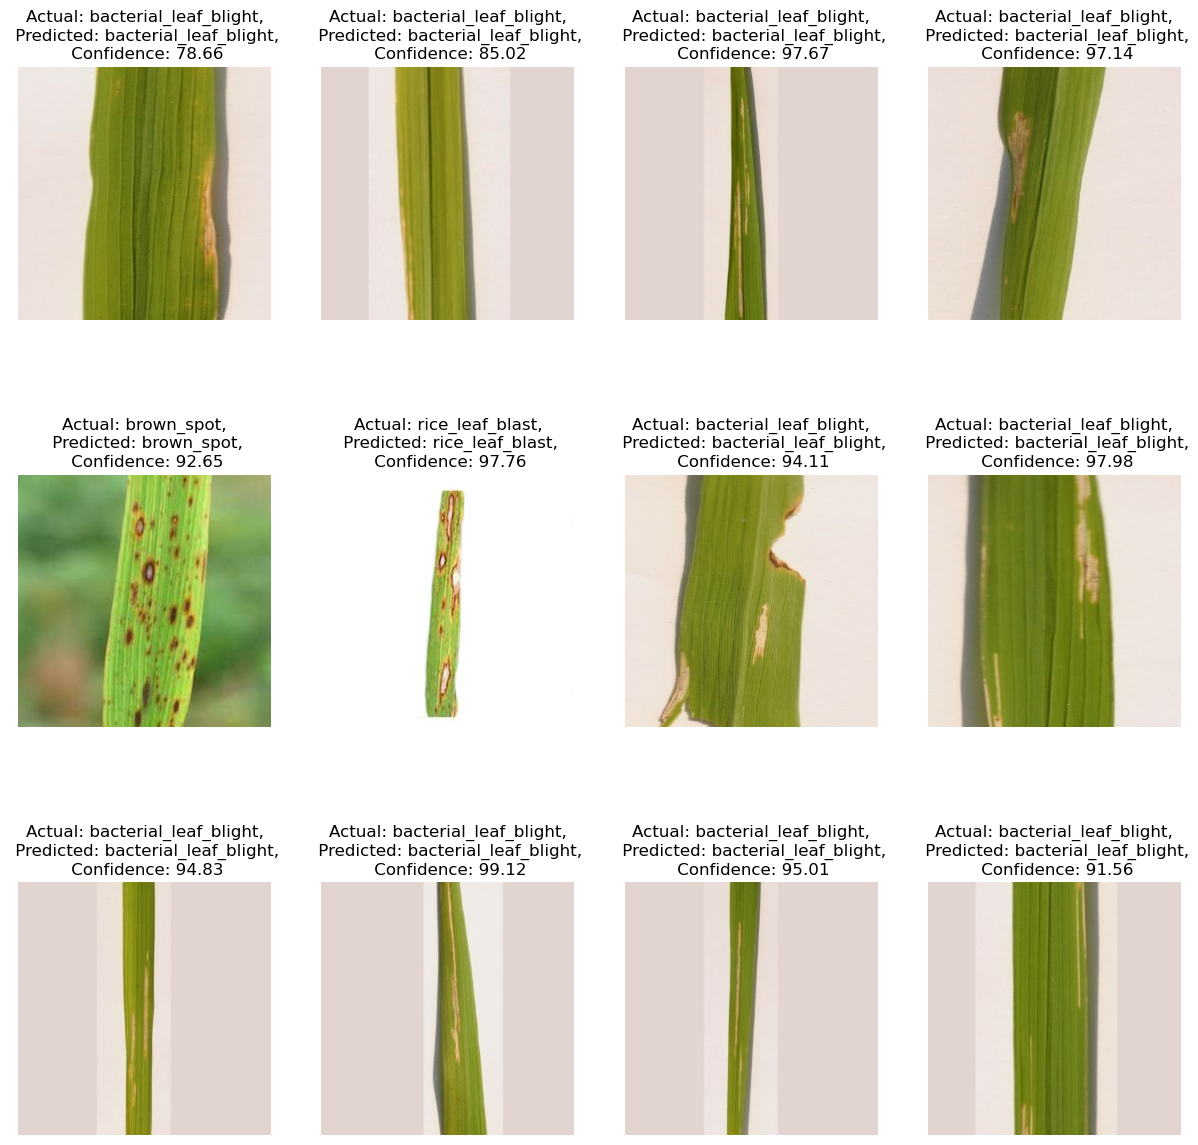

In [31]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(loaded_model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")
        plt.savefig("predictions.jpg", format="jpg")
        plt.axis('off')